In [ ]:
# Design model (input size, output size, forward_pass)
# construct loss and optimizer
# training:
#   forward pass: compute prediction
#   backward pass: gradients
#   update weights

epoch 10: loss = 1071.9968
epoch 20: loss = 3690.1335
epoch 30: loss = 4158.9912
epoch 40: loss = 939.6409
epoch 50: loss = 5483.3354
epoch 60: loss = 1531.3383
epoch 70: loss = 3283.9910
epoch 80: loss = 4364.9136
epoch 90: loss = 1045.3203
epoch 100: loss = 5038.6953


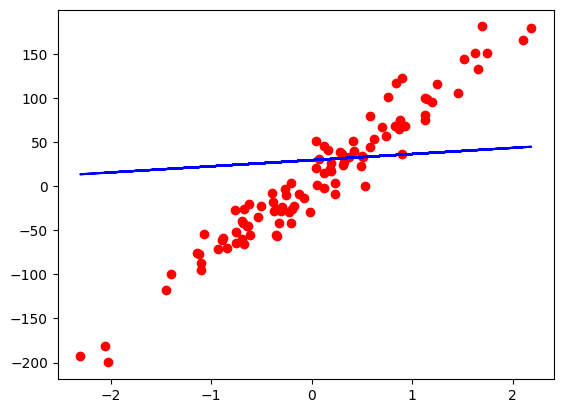

In [7]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepaire data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizers = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training
num_epochs = 100

for epoch in range(num_epochs):
  # prediction = forward pass
  y_pred = model(x)

  # loss
  loss = criterion(y, y_pred)

  # gradients = backward pass
  loss.backward() # dl/dw

  # update weights
  optimizers.step()

  # zero gradients
  optimizers.zero_grad

  if (epoch+1) % 10 == 0:  # printing every 10 steps
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: loss = {loss.item():.4f}') # dont wants to print tensor so, used [][].items

# plot

predicted = model(x).detach() # generate new tensor  #gred = False
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()



